# Question 3

In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


# 4.1

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):

        img_csv = self.img_labels.iloc[idx, 1:].values
        image = img_csv.reshape(28, 28)

        label = self.img_labels.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
training_data = CustomImageDataset(
    annotations_file = "/home/walke/college/cv/ass1/archive/train.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_data = CustomImageDataset(
    annotations_file = "/home/walke/college/cv/ass1/archive/test.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

train_dataset, val_dataset = torch.utils.data.random_split(training_data, [int(0.75*len(training_data)), int(0.25*len(training_data))])

KeyboardInterrupt: 

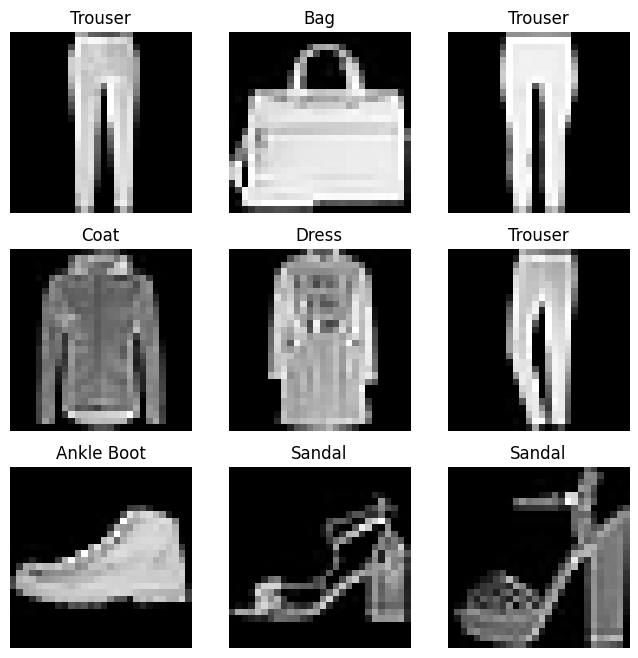


    0: T-Shirt,
    1: Trouser,
    2: Pullover,
    3: Dress,
    4: Coat,
    5: Sandal,
    6: Shirt,
    7: Sneaker,
    8: Bag,
    9: Ankle Boot


In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    label_new = torch.argmax(label).item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label_new])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print("""
    0: T-Shirt,
    1: Trouser,
    2: Pullover,
    3: Dress,
    4: Coat,
    5: Sandal,
    6: Shirt,
    7: Sneaker,
    8: Bag,
    9: Ankle Boot""")

# 4.2

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64, 10])


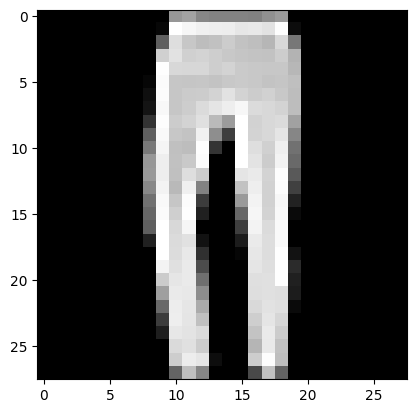

Label: tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [12]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


# MLP model 1

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

model = NeuralNetwork().to(device)
print(model)

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0327, -0.0188,  0.0145,  ...,  0.0180, -0.0283,  0.0325],
        [ 0.0045, -0.0193,  0.0074,  ..., -0.0060, -0.0195,  0.0301]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0317, -0.0052], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0418,  0.0065, -0.0205,  ..., -0.0092, -0.0290, -0.0348],
        [-0.0141, -0.0137,  0.0233,  ...,  0.0383,  0.0329,  0.0194]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

La

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='cuda:0')


In [1]:
from tqdm import tqdm

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total = len(dataloader)

    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in tqdm(enumerate(dataloader),desc="train", total = total):
        # Compute prediction and loss
        X, y = X.to(device).float(), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



def test_loop(dataloader, model, loss_fn, model_path):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.load_state_dict(torch.load(model_path))

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            
            y = torch.argmax(y, dim=1)  
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


def val_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    val_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
            
            y = torch.argmax(y, dim=1)  
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    val_loss /= num_batches
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg Validation loss: {val_loss:>8f} \n")

    return correct


    

In [16]:

learning_rate = 1e-3
batch_size = 64
epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# model.to(device)
val_accuracy_highest = 0
val_accuracy_curr = 0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    val_accuracy_curr = val_loop(test_dataloader, model, loss_fn)
    if val_accuracy_curr > val_accuracy_highest:
        val_accuracy_highest = val_accuracy_curr
        model_path = 'model_1'
        print(f"Saving Model at epoch: {t+1}\n")
        torch.save(model.state_dict(), model_path)

    
print("Done!")

test_loop(test_dataloader, model, loss_fn, "model_1")

Epoch 1
-------------------------------


train: 100%|██████████| 704/704 [00:10<00:00, 67.81it/s]


Validation Error: 
 Accuracy: 80.4%, Avg Validation loss: 0.556956 

Saving Model at epoch: 1

Epoch 2
-------------------------------


train: 100%|██████████| 704/704 [00:12<00:00, 55.84it/s]


Validation Error: 
 Accuracy: 85.3%, Avg Validation loss: 0.425879 

Saving Model at epoch: 2

Epoch 3
-------------------------------


train: 100%|██████████| 704/704 [00:10<00:00, 65.85it/s]


Validation Error: 
 Accuracy: 80.6%, Avg Validation loss: 0.670065 

Epoch 4
-------------------------------


train: 100%|██████████| 704/704 [00:10<00:00, 67.67it/s]


Validation Error: 
 Accuracy: 87.0%, Avg Validation loss: 0.375139 

Saving Model at epoch: 4

Epoch 5
-------------------------------


train: 100%|██████████| 704/704 [00:12<00:00, 56.56it/s]


Validation Error: 
 Accuracy: 85.4%, Avg Validation loss: 0.401176 

Epoch 6
-------------------------------


train: 100%|██████████| 704/704 [00:11<00:00, 63.04it/s]


Validation Error: 
 Accuracy: 86.9%, Avg Validation loss: 0.369174 

Epoch 7
-------------------------------


train: 100%|██████████| 704/704 [00:14<00:00, 49.16it/s]


Validation Error: 
 Accuracy: 84.5%, Avg Validation loss: 0.443193 

Epoch 8
-------------------------------


train: 100%|██████████| 704/704 [00:11<00:00, 63.12it/s]


Validation Error: 
 Accuracy: 83.1%, Avg Validation loss: 0.500812 

Epoch 9
-------------------------------


train: 100%|██████████| 704/704 [00:12<00:00, 55.90it/s]


Validation Error: 
 Accuracy: 82.6%, Avg Validation loss: 0.511713 

Epoch 10
-------------------------------


train: 100%|██████████| 704/704 [00:12<00:00, 57.79it/s]


Validation Error: 
 Accuracy: 84.7%, Avg Validation loss: 0.434074 

Done!


/tmp/ipykernel_86510/1745206214.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Test Error: 
 Accuracy: 87.0%, Avg loss: 0.374879 



: 

In [ ]:
import cv2 as cv

test_img_labels = pd.read_csv("/home/walke/college/cv/ass1/archive/test.csv")
train_img_labels = pd.read_csv("/home/walke/college/cv/ass1/archive/train.csv")

for index in range(test_img_labels.shape[0]):
    img_csv = np.matrix(test_img_labels.iloc[index, 1:].values, dtype=np.uint8).reshape(28, 28)
    edges = cv.Canny(img_csv, 100, 200)
    test_img_labels.iloc[index, 1:] = edges.flatten()

test_img_labels.to_csv("edges_test.csv", index=False)

for index in range(train_img_labels.shape[0]):
    img_csv = np.matrix(train_img_labels.iloc[index, 1:].values, dtype=np.uint8).reshape(28, 28)
    edges = cv.Canny(img_csv, 100, 200)
    train_img_labels.iloc[index, 1:] = edges.flatten()

train_img_labels.to_csv("edges_train.csv", index=False)

class MLP2ImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):

        img_csv = self.img_labels.iloc[idx, 1:].values
        image = img_csv.reshape(28, 28)

        label = self.img_labels.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

training_data_edge = MLP2ImageDataset(
    annotations_file = "edges_train.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_data_edge = MLP2ImageDataset(
    annotations_file = "edges_test.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

train_dataset_edge, val_dataset_edge = torch.utils.data.random_split(training_data_edge, [int(0.75*len(training_data_edge)), int(0.25*len(training_data_edge))])

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_edge), size=(1,)).item()
    img, label = train_dataset_edge[sample_idx]
    label_new = torch.argmax(label).item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label_new])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

train_dataloader_edge = DataLoader(train_dataset_edge, batch_size=64, shuffle=True)
val_dataloader_edge = DataLoader(val_dataset_edge, batch_size=64, shuffle=True)
test_dataloader_edge = DataLoader(test_data_edge, batch_size=64, shuffle=True)


In [ ]:

learning_rate_edge = 1e-3
batch_size_edge = 64
epochs_edge = 10

loss_fn_edge = nn.CrossEntropyLoss()
optimizer_edge = torch.optim.SGD(model.parameters(), lr=learning_rate_edge)

# model.to(device)
val_accuracy_highest_edge = 0
val_accuracy_curr_edge = 0

for t in range(epochs_edge):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_edge, model, loss_fn_edge, optimizer_edge)
    val_accuracy_curr_edge = val_loop(test_dataloader_edge, model, loss_fn_edge)
    if val_accuracy_curr_edge > val_accuracy_highest_edge:
        val_accuracy_highest_edge = val_accuracy_curr_edge
        model_path = 'model_1_edge'
        print(f"Saving Model at epoch: {t+1}\n")
        torch.save(model.state_dict(), model_path)

    
print("Done!")

test_loop(test_dataloader_edge, model, loss_fn_edge, "model_1_edge")

Epoch 1
-------------------------------


train: 100%|██████████| 704/704 [00:19<00:00, 36.49it/s]


Validation Error: 
 Accuracy: 73.6%, Avg Validation loss: 0.727660 

Saving Model at epoch: 1

Epoch 2
-------------------------------


train: 100%|██████████| 704/704 [00:14<00:00, 47.11it/s]


Validation Error: 
 Accuracy: 76.1%, Avg Validation loss: 0.662515 

Saving Model at epoch: 2

Epoch 3
-------------------------------


train: 100%|██████████| 704/704 [00:23<00:00, 30.52it/s]


Validation Error: 
 Accuracy: 79.7%, Avg Validation loss: 0.576568 

Saving Model at epoch: 3

Epoch 4
-------------------------------


train: 100%|██████████| 704/704 [00:16<00:00, 42.14it/s]


Validation Error: 
 Accuracy: 79.6%, Avg Validation loss: 0.591299 

Epoch 5
-------------------------------


train: 100%|██████████| 704/704 [00:15<00:00, 45.62it/s]


Validation Error: 
 Accuracy: 79.3%, Avg Validation loss: 0.617127 

Epoch 6
-------------------------------


train: 100%|██████████| 704/704 [00:16<00:00, 42.21it/s]


Validation Error: 
 Accuracy: 77.5%, Avg Validation loss: 0.711855 

Epoch 7
-------------------------------


train: 100%|██████████| 704/704 [00:15<00:00, 46.08it/s]


Validation Error: 
 Accuracy: 80.9%, Avg Validation loss: 0.581679 

Saving Model at epoch: 7

Epoch 8
-------------------------------


train: 100%|██████████| 704/704 [00:16<00:00, 42.36it/s]


Validation Error: 
 Accuracy: 81.0%, Avg Validation loss: 0.608402 

Saving Model at epoch: 8

Epoch 9
-------------------------------


train: 100%|██████████| 704/704 [00:15<00:00, 44.08it/s]


Validation Error: 
 Accuracy: 80.1%, Avg Validation loss: 0.680216 

Epoch 10
-------------------------------


train: 100%|██████████| 704/704 [00:15<00:00, 45.19it/s]


Validation Error: 
 Accuracy: 81.4%, Avg Validation loss: 0.629517 

Saving Model at epoch: 10

Done!


/tmp/ipykernel_84063/1745206214.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Test Error: 
 Accuracy: 81.4%, Avg loss: 0.634104 



In [ ]:
import cv2 as cv
import pandas as pd
import numpy as np

test_img_labels = pd.read_csv("/home/walke/college/cv/ass1/archive/test.csv")

new_test_data = [] 

for index in range(test_img_labels.shape[0]):
    img_csv = np.matrix(test_img_labels.iloc[index, 1:].values, dtype=np.uint8).reshape(28, 28)
    label = test_img_labels.iloc[index, 0]


    winSize = (20,20)
    blockSize = (10,10)
    blockStride = (5,5)
    cellSize = (10,10)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradients = True
 
    hog = cv.HOGDescriptor(winSize,blockSize,blockStride,
    cellSize,nbins,derivAperture,
    winSigma,histogramNormType,L2HysThreshold,
    gammaCorrection,nlevels, signedGradients)

    descriptor = hog.compute(img_csv)

    row = np.concatenate(([label], descriptor))
    new_test_data.append(row)

column_names = ["label"] + [f"feature_{i+1}" for i in range(len(new_test_data[0]) - 1)]
new_df = pd.DataFrame(new_test_data, columns=column_names)


new_df.to_csv("hog_test.csv", index=False)


In [5]:
train_img_labels = pd.read_csv("/home/walke/college/cv/ass1/archive/train.csv")

new_train_data = [] 

for index in range(train_img_labels.shape[0]):
    img_csv = np.matrix(train_img_labels.iloc[index, 1:].values, dtype=np.uint8).reshape(28, 28)
    label = train_img_labels.iloc[index, 0]


    winSize = (20,20)
    blockSize = (10,10)
    blockStride = (5,5)
    cellSize = (10,10)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradients = True
 
    hog = cv.HOGDescriptor(winSize,blockSize,blockStride,
    cellSize,nbins,derivAperture,
    winSigma,histogramNormType,L2HysThreshold,
    gammaCorrection,nlevels, signedGradients)

    descriptor = hog.compute(img_csv)

    row = np.concatenate(([label], descriptor))
    new_train_data.append(row)

column_names = ["label"] + [f"feature_{i+1}" for i in range(len(new_train_data[0]) - 1)]
new_df = pd.DataFrame(new_train_data, columns=column_names)


new_df.to_csv("hog_train.csv", index=False)

In [6]:
class hogImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):

        img_csv = self.img_labels.iloc[idx, 1:].values
        image = img_csv.reshape(9, 9)

        label = self.img_labels.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(int(label))
        return image, label
    

training_data_hog = hogImageDataset(
    annotations_file = "hog_train.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_data_hog = hogImageDataset(
    annotations_file = "hog_test.csv",
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

train_dataset_hog, val_dataset_hog = torch.utils.data.random_split(training_data_hog, [int(0.75*len(training_data_hog)), int(0.25*len(training_data_hog))])


NameError: name 'Dataset' is not defined

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    sample_idx = torch.randint(len(train_dataset_hog), size=(1,)).item()

    img, label = train_dataset_hog[sample_idx]

    label_new = torch.argmax(label).item()

    figure.add_subplot(rows, cols, i)

    plt.title(labels_map[label_new])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

train_dataloader_hog = DataLoader(train_dataset_hog, batch_size=64, shuffle=True)
val_dataloader_hog = DataLoader(val_dataset_hog, batch_size=64, shuffle=True)
test_dataloader_hog = DataLoader(test_data_hog, batch_size=64, shuffle=True)


In [ ]:
class NeuralNetwork_hog(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9*9, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

model_hog = NeuralNetwork_hog().to(device)
print(model_hog)

for name, param in model_hog.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")



In [ ]:
learning_rate_hog = 1e-3
batch_size_hog = 64
epochs_hog = 20

loss_fn_hog = nn.CrossEntropyLoss()
optimizer_hog = torch.optim.SGD(model_hog.parameters(), lr=learning_rate_hog)

# model.to(device)
val_accuracy_highest_hog = 0
val_accuracy_curr_hog = 0

for t in range(epochs_hog):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_hog, model_hog, loss_fn_hog, optimizer_hog)
    val_accuracy_curr_hog = val_loop(test_dataloader_hog, model_hog, loss_fn_hog)
    if val_accuracy_curr_hog > val_accuracy_highest_hog:
        val_accuracy_highest_hog = val_accuracy_curr_hog
        model_path = 'model_1_hog'
        print(f"Saving Model at epoch: {t+1}\n")
        torch.save(model_hog.state_dict(), model_path)

    
print("Done!")

test_loop(test_dataloader_hog, model_hog, loss_fn_hog, "model_1_hog")